In [2]:
import pandas as pd
data = pd.read_csv('./training_data_fall2024.csv')
data = pd.get_dummies(data, columns=["hour_of_day", "day_of_week", "month"])
data['increase_stock'] = data['increase_stock'] == 'low_bike_demand'

In [82]:
# data = data[['increase_stock', 'temp', 'dew', 'humidity', 'precip', 'snowdepth', 'windspeed', 'cloudcover', 'visibility']]
data['temp_cold'] = data['temp'] < 5
data['dew_low'] = data['dew'] < -10
data['precip_0'] = data['precip'] == 0
data['snowdepth_0'] = data['snowdepth'] == 0

data = data.astype(float)

<Axes: >

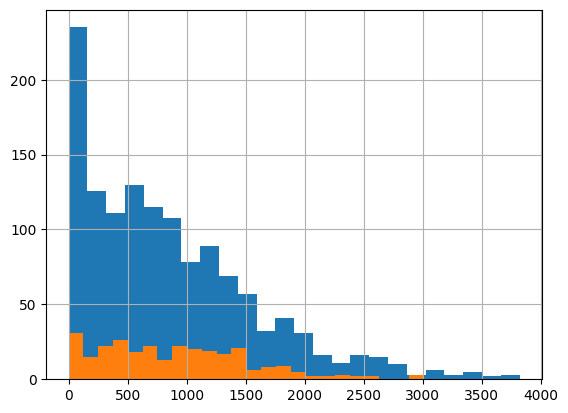

In [12]:
anadata = data[['increase_stock', 'temp', 'dew', 'humidity', 'precip', 'snowdepth', 'windspeed', 'cloudcover', 'visibility']].astype(float)
name = 'combine'
anadata[name] = anadata['windspeed'] * anadata['cloudcover']
anadata[anadata['increase_stock'] == 1.0][name].hist(bins=24)
anadata[anadata['increase_stock'] == 0.0][name].hist(bins=24)

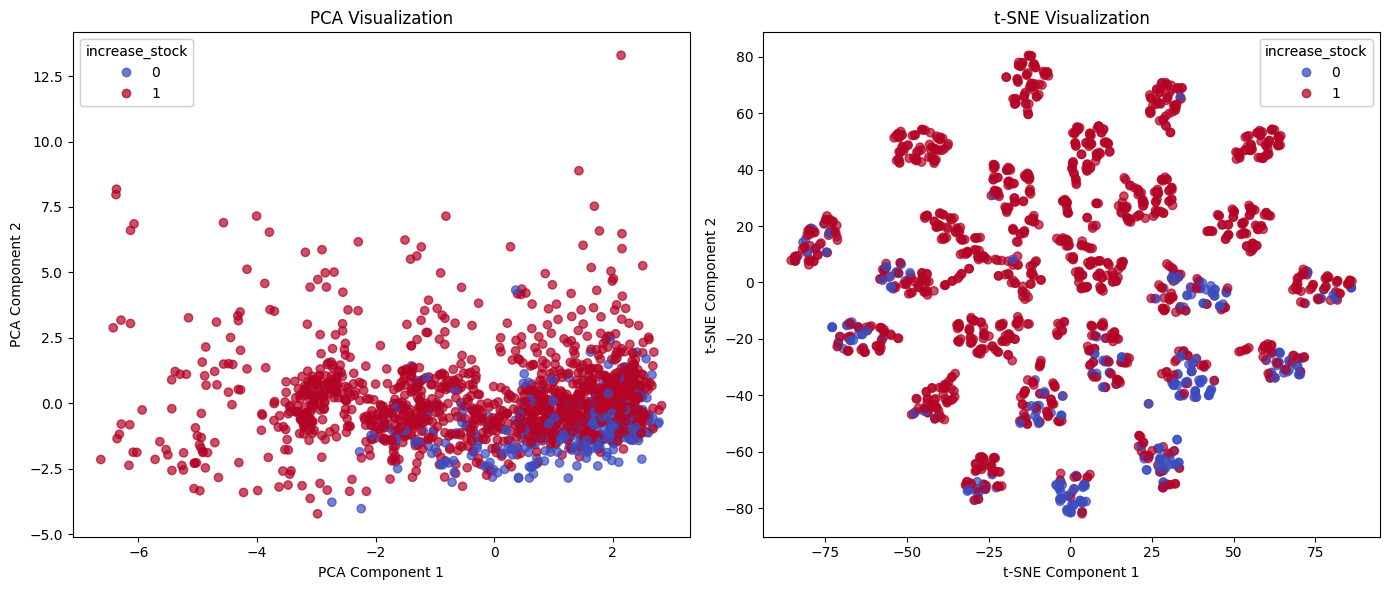

In [83]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def visualize_tsne_pca(dataframe, label_column='increase_stock'):
    """
    Visualize a DataFrame using both t-SNE and PCA, with coloring based on labels.

    Parameters:
        dataframe (pd.DataFrame): The input DataFrame to visualize.
        label_column (str): The label column to use for coloring (binary: True/False).

    Returns:
        None (plots the PCA and t-SNE visualizations).
    """
    # Separate features and labels
    data = dataframe.drop(columns=[label_column], errors='ignore')
    labels = dataframe[label_column].astype(int)  # Convert labels to integers for plotting

    # Ensure all features are numeric
    data = data.select_dtypes(include=[np.number])

    # Standardize the data
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(data)

    # PCA Visualization
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(normalized_data)

    # t-SNE Visualization
    tsne = TSNE(n_components=2, perplexity=10, random_state=42)
    tsne_result = tsne.fit_transform(normalized_data)

    # Create subplots for both visualizations
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # PCA plot
    scatter1 = axes[0].scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='coolwarm', alpha=0.7)
    axes[0].set_title('PCA Visualization')
    axes[0].set_xlabel('PCA Component 1')
    axes[0].set_ylabel('PCA Component 2')
    legend1 = axes[0].legend(*scatter1.legend_elements(), title=label_column)
    axes[0].add_artist(legend1)

    # t-SNE plot
    scatter2 = axes[1].scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='coolwarm', alpha=0.7)
    axes[1].set_title('t-SNE Visualization')
    axes[1].set_xlabel('t-SNE Component 1')
    axes[1].set_ylabel('t-SNE Component 2')
    legend2 = axes[1].legend(*scatter2.legend_elements(), title=label_column)
    axes[1].add_artist(legend2)

    plt.tight_layout()
    plt.show()


visualize_tsne_pca(data)